# Preliminares

1. Pasar lista.
2. Instalar/revisar software en los computadores. 
3. Crear cuenta en github

# Parte 1: 9:40 - 11:10

Introducción a Python

## Operaciones aritméticas simples


In [ ]:
x = 1
y = 2
print(x / y)
print(x + y)

In [ ]:
print("hola mundo")

## Funciones más complejas


Para esto usaremos la libría numpy

In [ ]:
# Carga numpy en memoria y la nombra np
import numpy as np

# Calcular la raiz cuadrada (square root: sqrt)
x = 4
np.sqrt(x)

In [ ]:
# Calcular 2 elevado a 5
x = 2
np.power(x,5)

In [ ]:
# Calcular logaritmo de 100 en base 10
x = 100
np.log10(x)

In [ ]:
# Calcular logaritmo de 100 en base e
x = 100
np.log(x)

## Creación de secuencias


In [ ]:
# Creación manual de secuencias
x = np.array([0,1,2,3,4,5,6,7,8,9,10]) # crea una secuencia de 0 a 10
x

In [ ]:
# Creación automatica de secuencias
x=np.linspace(0,10,100) # crea una secuencia entre 0 y 10 con 100 elementos igualmente spaceados
y=np.linspace(-10,10,100) # crea una secuencia entre -10 y 10 con 100 elementos igualmente spaceados

In [ ]:
z=np.linspace(2,7,20)

In [ ]:
# se pueden aplicar las funciones anteriores a vectores, por ejemplo:
np.sin(x)

## Ejercicios


Cálcula: 

1. log(x) en el rango x=[0.1,30] 
2. cos(x) en el rango x=[-10,10]
3. x^3 en el rango x=[-5,5]
4. x^0.5 en el rango x=[0.1,20]

## Representaciones gráficas


Para esto usaremos la librería matplotlib, en particular pyplot 

In [ ]:
# Cargar desde matplotlib la librería pyplot, llamandola plt
from matplotlib import pyplot as plt

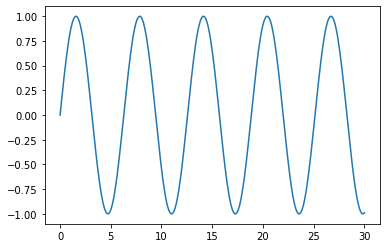

In [24]:
# Grafica dos secuencias hechas automaticamente
x=np.linspace(0,30,300)
y=np.sin(x)
plt.plot(x,y)
plt.show()

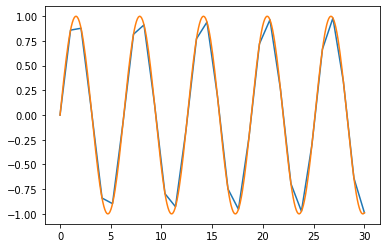

In [25]:
x=np.linspace(0,30,30)
plt.plot(x,np.sin(x))

x=np.linspace(0,30,300)
plt.plot(x,np.sin(x))
plt.show()

Ejercicios
----------

Realiza el gráfico de: 

1. log(x) en el rango x=[0.1,30] 
2. cos(x) en el rango x=[-10,10]
3. x^3 en el rango x=[-5,5]
4. x^0.5 en el rango x=[0.1,20]

## Cliclos iterativos

In [37]:
import numpy as np
for i in range(11):
    x = np.cos(i)
    print(i,x)

0 1.0
1 0.5403023058681398
2 -0.4161468365471424
3 -0.9899924966004454
4 -0.6536436208636119
5 0.28366218546322625
6 0.960170286650366
7 0.7539022543433046
8 -0.14550003380861354
9 -0.9111302618846769
10 -0.8390715290764524


In [39]:
# Ejemplo

lista = []
for i in range(5):
    lista.append(i)
    print(lista)


[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]


### Ejemplo: Serie de Fibonacci

<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/2021/fibonacci.png" alt="Drawing" style="width: 400px;"/>

In [40]:
values = [0,1] # se inicializa la serie de Fibonacci
for i in range(10):
    values.append(values[-2]+values[-1])
values    

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

### Otras cosas interesantes

In [48]:
# el largo de una lista o cadena de caracters lo obtenemos con len()
x="hola" # cadena de 4 caracteres
len(x)

4

In [49]:
x=[0,1,2,3,4] # lista con 5 elementos
len(x)

5

In [50]:
# Iterar sobre los elementos de una lista

# Por ejemplo imprimamos sublistas de una lista

x=[0,1,2,3,4]
n= len(x)
for i in range(n):
    sublista = x[0:i]
    print(sublista)

[]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]


In [53]:
# Iterar sobre los elementos de una lista
# Por ejemplo imprimamos sublistas de una lista
x="ACGTCCGATTAC"
n= len(x)
for i in range(n):
    sublista = x[0:(i+1)]
    print(sublista)

A
AC
ACG
ACGT
ACGTC
ACGTCC
ACGTCCG
ACGTCCGA
ACGTCCGAT
ACGTCCGATT
ACGTCCGATTA
ACGTCCGATTAC


# Ejercicio

Dada la secuencia genética:

```
X="ACGTACTACCTACACTACGACTACACTACTACCTACGACTACTACCTACGACT"
```

Escribe un ciclo iterativo for que extraiga subsecuencia de 3 elementos y los imprima en pantalla. Por ejemplo:

```
ACG # estos son los primeros tres caracteres

CGT # estos son los siguientes tres caracteres

...

ACT # y asi hasta llegar a los últimos tres caracteres
```

# Ejercicio

Dada la secuencia genética:

```
X="ACGTACTACCTACACTACGACTACACTACTACCTACGACTACTACCTACGACT"
```
Econtrar las coordenadas en donde está la subsecuenca "CCT"

# Parte 2: 11:20- 12:50

Objetivos:
* Dada una secuencia genética, determinar patrones con posibles funciones biológicas
* Implementar computacionalmente una función para countar subsecuencias dentro de la secuencia principal.

Introducción
-------------------

Para ganar intuición, analizemos un problema fundamental de bioinformática: ¿en dónde está el origen de replicación del genoma bacteriano?

<img src="https://raw.githubusercontent.com/mrivas/Bioinformatica/master/naive_replication.png" alt="Drawing" style="width: 400px;"/>

[Imagen de https://www.bioinformaticsalgorithms.org/](https://www.bioinformaticsalgorithms.org/bioinformatics-chapter-1)

Hay una secuencia que es reconocida por la maquinaria transcripcional. Esa secuencia (puede haber tener más de una copia en el genoma) es donde comienza a replicarse el material genético.

Para encontrar tal secuencia, comenzemos por resolver problemas más simples que luego escalaremos para abarcar la complejidad del problema en cuestion. 

Dada una secuencia (genética, de texto, o lo que sea), empezemos por contar cuantas veces en ella está repetido un patrón. Por ejemplo, en la secuencia

```python
Secuencia="Hola, ¿como estas?. Hola, bien gracias. Y tú, ¿qué cuentas?"
```

1 ¿Cuántas vences aparece el patrón

```python
"Hola"?
```

2 ¿Cuántas vences aparece el patrón

```python
"as"?
```


Ejercicio
=========

Implementa este algoritmo en Python. Para esto puedes usar el siguiente seudocódigo:

```python
PatternCount(Text, Pattern)
    count ← 0
    for i ← 0 to |Text| − |Pattern|
        if Text(i, |Pattern|) = Pattern
            count ← count + 1
    return count
```

In [ ]:
Text="Hola, ¿como estas?. Hola, bien gracias. Y tú, ¿qué cuentas?"